# Computer Vision Nanodegree

## Project: Image Captioning

---

In this notebook, you will use your trained model to generate captions for images in the test dataset.

This notebook **will be graded**.  

Feel free to use the links below to navigate the notebook:
- [Step 1](#step1): Get Data Loader for Test Dataset 
- [Step 2](#step2): Load Trained Models
- [Step 3](#step3): Finish the Sampler
- [Step 4](#step4): Clean up Captions
- [Step 5](#step5): Generate Predictions!

<a id='step1'></a>
## Step 1: Get Data Loader for Test Dataset

Before running the code cell below, define the transform in `transform_test` that you would like to use to pre-process the test images.  

Make sure that the transform that you define here agrees with the transform that you used to pre-process the training images (in **2_Training.ipynb**).  For instance, if you normalized the training images, you should also apply the same normalization procedure to the test images.

In [1]:
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO
from data_loader import get_loader
from torchvision import transforms

# TODO #1: Define a transform to pre-process the testing images.
# Just use the default transoform from previous one should be okay
transform_test = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])
#-#-#-# Do NOT modify the code below this line. #-#-#-#

# Create the data loader.
data_loader = get_loader(transform=transform_test,    
                         mode='test')

Vocabulary successfully loaded from vocab.pkl file!


Run the code cell below to visualize an example test image, before pre-processing is applied.

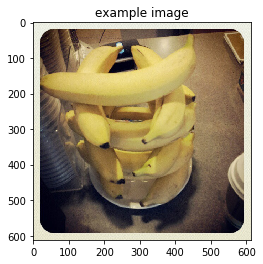

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Obtain sample image before and after pre-processing.
orig_image, image = next(iter(data_loader))

# Visualize sample image, before pre-processing.
plt.imshow(np.squeeze(orig_image))
plt.title('example image')
plt.show()

<a id='step2'></a>
## Step 2: Load Trained Models

In the next code cell we define a `device` that you will use move PyTorch tensors to GPU (if CUDA is available).  Run this code cell before continuing.

In [3]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Before running the code cell below, complete the following tasks.

### Task #1

In the next code cell, you will load the trained encoder and decoder from the previous notebook (**2_Training.ipynb**).  To accomplish this, you must specify the names of the saved encoder and decoder files in the `models/` folder (e.g., these names should be `encoder-5.pkl` and `decoder-5.pkl`, if you trained the model for 5 epochs and saved the weights after each epoch).  

### Task #2

Plug in both the embedding size and the size of the hidden layer of the decoder corresponding to the selected pickle file in `decoder_file`.

In [4]:
# Watch for any changes in model.py, and re-load it automatically.
% load_ext autoreload
% autoreload 2

import os
import torch
from model import EncoderCNN, DecoderRNN

# TODO #2: Specify the saved models to load.
encoder_file = 'decoder-1.pkl'
decoder_file = 'decoder-1.pkl'

# TODO #3: Select appropriate values for the Python variables below.
embed_size = 512
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder, and set each to inference mode.
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()
a = torch.load(os.path.join('./models', encoder_file))
print (a)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:06<00:00, 14869793.70it/s]


OrderedDict([('emdededSys.weight', tensor([[-5.0653e-02, -9.9281e-02,  2.4656e-02,  ..., -3.5724e-02,
         -2.5560e-02,  1.5727e-01],
        [ 9.2516e-02, -6.6868e-02,  4.0768e-02,  ..., -2.9985e-03,
         -7.5248e-02,  2.6272e-03],
        [ 5.7595e-02,  7.8880e-02,  3.2061e-02,  ..., -9.3759e-02,
          9.7536e-02, -1.6175e-01],
        ...,
        [ 1.3942e-01,  1.0797e-01, -1.2334e-01,  ...,  9.8295e-02,
         -1.9926e-02, -5.5741e-02],
        [-9.0135e-02,  4.5091e-02, -1.4719e-02,  ...,  1.0069e-01,
         -1.1443e-02,  5.5962e-02],
        [-9.3615e-02, -1.3218e-01,  1.0184e-01,  ...,  3.0144e-02,
         -4.9502e-02, -4.8726e-03]], device='cuda:0')), ('lstm.weight_ih_l0', tensor([[-1.3897e-01, -2.0743e-02,  7.0813e-02,  ..., -3.2382e-02,
          1.2620e-02, -2.0690e-02],
        [ 3.0392e-02,  1.7333e-02, -1.3282e-01,  ...,  1.0422e-01,
         -6.6482e-02,  1.5571e-02],
        [-3.3407e-02,  2.1499e-02, -1.1578e-02,  ..., -4.7236e-03,
         -2.3451e-0

In [7]:

# Load the trained weights.
encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))

# Move models to GPU if CUDA is available.
encoder.to(device)
decoder.to(device)


RuntimeError: Error(s) in loading state_dict for EncoderCNN:
	Missing key(s) in state_dict: "resnet.0.weight", "resnet.1.weight", "resnet.1.bias", "resnet.1.running_mean", "resnet.1.running_var", "resnet.4.0.conv1.weight", "resnet.4.0.bn1.weight", "resnet.4.0.bn1.bias", "resnet.4.0.bn1.running_mean", "resnet.4.0.bn1.running_var", "resnet.4.0.conv2.weight", "resnet.4.0.bn2.weight", "resnet.4.0.bn2.bias", "resnet.4.0.bn2.running_mean", "resnet.4.0.bn2.running_var", "resnet.4.0.conv3.weight", "resnet.4.0.bn3.weight", "resnet.4.0.bn3.bias", "resnet.4.0.bn3.running_mean", "resnet.4.0.bn3.running_var", "resnet.4.0.downsample.0.weight", "resnet.4.0.downsample.1.weight", "resnet.4.0.downsample.1.bias", "resnet.4.0.downsample.1.running_mean", "resnet.4.0.downsample.1.running_var", "resnet.4.1.conv1.weight", "resnet.4.1.bn1.weight", "resnet.4.1.bn1.bias", "resnet.4.1.bn1.running_mean", "resnet.4.1.bn1.running_var", "resnet.4.1.conv2.weight", "resnet.4.1.bn2.weight", "resnet.4.1.bn2.bias", "resnet.4.1.bn2.running_mean", "resnet.4.1.bn2.running_var", "resnet.4.1.conv3.weight", "resnet.4.1.bn3.weight", "resnet.4.1.bn3.bias", "resnet.4.1.bn3.running_mean", "resnet.4.1.bn3.running_var", "resnet.4.2.conv1.weight", "resnet.4.2.bn1.weight", "resnet.4.2.bn1.bias", "resnet.4.2.bn1.running_mean", "resnet.4.2.bn1.running_var", "resnet.4.2.conv2.weight", "resnet.4.2.bn2.weight", "resnet.4.2.bn2.bias", "resnet.4.2.bn2.running_mean", "resnet.4.2.bn2.running_var", "resnet.4.2.conv3.weight", "resnet.4.2.bn3.weight", "resnet.4.2.bn3.bias", "resnet.4.2.bn3.running_mean", "resnet.4.2.bn3.running_var", "resnet.5.0.conv1.weight", "resnet.5.0.bn1.weight", "resnet.5.0.bn1.bias", "resnet.5.0.bn1.running_mean", "resnet.5.0.bn1.running_var", "resnet.5.0.conv2.weight", "resnet.5.0.bn2.weight", "resnet.5.0.bn2.bias", "resnet.5.0.bn2.running_mean", "resnet.5.0.bn2.running_var", "resnet.5.0.conv3.weight", "resnet.5.0.bn3.weight", "resnet.5.0.bn3.bias", "resnet.5.0.bn3.running_mean", "resnet.5.0.bn3.running_var", "resnet.5.0.downsample.0.weight", "resnet.5.0.downsample.1.weight", "resnet.5.0.downsample.1.bias", "resnet.5.0.downsample.1.running_mean", "resnet.5.0.downsample.1.running_var", "resnet.5.1.conv1.weight", "resnet.5.1.bn1.weight", "resnet.5.1.bn1.bias", "resnet.5.1.bn1.running_mean", "resnet.5.1.bn1.running_var", "resnet.5.1.conv2.weight", "resnet.5.1.bn2.weight", "resnet.5.1.bn2.bias", "resnet.5.1.bn2.running_mean", "resnet.5.1.bn2.running_var", "resnet.5.1.conv3.weight", "resnet.5.1.bn3.weight", "resnet.5.1.bn3.bias", "resnet.5.1.bn3.running_mean", "resnet.5.1.bn3.running_var", "resnet.5.2.conv1.weight", "resnet.5.2.bn1.weight", "resnet.5.2.bn1.bias", "resnet.5.2.bn1.running_mean", "resnet.5.2.bn1.running_var", "resnet.5.2.conv2.weight", "resnet.5.2.bn2.weight", "resnet.5.2.bn2.bias", "resnet.5.2.bn2.running_mean", "resnet.5.2.bn2.running_var", "resnet.5.2.conv3.weight", "resnet.5.2.bn3.weight", "resnet.5.2.bn3.bias", "resnet.5.2.bn3.running_mean", "resnet.5.2.bn3.running_var", "resnet.5.3.conv1.weight", "resnet.5.3.bn1.weight", "resnet.5.3.bn1.bias", "resnet.5.3.bn1.running_mean", "resnet.5.3.bn1.running_var", "resnet.5.3.conv2.weight", "resnet.5.3.bn2.weight", "resnet.5.3.bn2.bias", "resnet.5.3.bn2.running_mean", "resnet.5.3.bn2.running_var", "resnet.5.3.conv3.weight", "resnet.5.3.bn3.weight", "resnet.5.3.bn3.bias", "resnet.5.3.bn3.running_mean", "resnet.5.3.bn3.running_var", "resnet.6.0.conv1.weight", "resnet.6.0.bn1.weight", "resnet.6.0.bn1.bias", "resnet.6.0.bn1.running_mean", "resnet.6.0.bn1.running_var", "resnet.6.0.conv2.weight", "resnet.6.0.bn2.weight", "resnet.6.0.bn2.bias", "resnet.6.0.bn2.running_mean", "resnet.6.0.bn2.running_var", "resnet.6.0.conv3.weight", "resnet.6.0.bn3.weight", "resnet.6.0.bn3.bias", "resnet.6.0.bn3.running_mean", "resnet.6.0.bn3.running_var", "resnet.6.0.downsample.0.weight", "resnet.6.0.downsample.1.weight", "resnet.6.0.downsample.1.bias", "resnet.6.0.downsample.1.running_mean", "resnet.6.0.downsample.1.running_var", "resnet.6.1.conv1.weight", "resnet.6.1.bn1.weight", "resnet.6.1.bn1.bias", "resnet.6.1.bn1.running_mean", "resnet.6.1.bn1.running_var", "resnet.6.1.conv2.weight", "resnet.6.1.bn2.weight", "resnet.6.1.bn2.bias", "resnet.6.1.bn2.running_mean", "resnet.6.1.bn2.running_var", "resnet.6.1.conv3.weight", "resnet.6.1.bn3.weight", "resnet.6.1.bn3.bias", "resnet.6.1.bn3.running_mean", "resnet.6.1.bn3.running_var", "resnet.6.2.conv1.weight", "resnet.6.2.bn1.weight", "resnet.6.2.bn1.bias", "resnet.6.2.bn1.running_mean", "resnet.6.2.bn1.running_var", "resnet.6.2.conv2.weight", "resnet.6.2.bn2.weight", "resnet.6.2.bn2.bias", "resnet.6.2.bn2.running_mean", "resnet.6.2.bn2.running_var", "resnet.6.2.conv3.weight", "resnet.6.2.bn3.weight", "resnet.6.2.bn3.bias", "resnet.6.2.bn3.running_mean", "resnet.6.2.bn3.running_var", "resnet.6.3.conv1.weight", "resnet.6.3.bn1.weight", "resnet.6.3.bn1.bias", "resnet.6.3.bn1.running_mean", "resnet.6.3.bn1.running_var", "resnet.6.3.conv2.weight", "resnet.6.3.bn2.weight", "resnet.6.3.bn2.bias", "resnet.6.3.bn2.running_mean", "resnet.6.3.bn2.running_var", "resnet.6.3.conv3.weight", "resnet.6.3.bn3.weight", "resnet.6.3.bn3.bias", "resnet.6.3.bn3.running_mean", "resnet.6.3.bn3.running_var", "resnet.6.4.conv1.weight", "resnet.6.4.bn1.weight", "resnet.6.4.bn1.bias", "resnet.6.4.bn1.running_mean", "resnet.6.4.bn1.running_var", "resnet.6.4.conv2.weight", "resnet.6.4.bn2.weight", "resnet.6.4.bn2.bias", "resnet.6.4.bn2.running_mean", "resnet.6.4.bn2.running_var", "resnet.6.4.conv3.weight", "resnet.6.4.bn3.weight", "resnet.6.4.bn3.bias", "resnet.6.4.bn3.running_mean", "resnet.6.4.bn3.running_var", "resnet.6.5.conv1.weight", "resnet.6.5.bn1.weight", "resnet.6.5.bn1.bias", "resnet.6.5.bn1.running_mean", "resnet.6.5.bn1.running_var", "resnet.6.5.conv2.weight", "resnet.6.5.bn2.weight", "resnet.6.5.bn2.bias", "resnet.6.5.bn2.running_mean", "resnet.6.5.bn2.running_var", "resnet.6.5.conv3.weight", "resnet.6.5.bn3.weight", "resnet.6.5.bn3.bias", "resnet.6.5.bn3.running_mean", "resnet.6.5.bn3.running_var", "resnet.7.0.conv1.weight", "resnet.7.0.bn1.weight", "resnet.7.0.bn1.bias", "resnet.7.0.bn1.running_mean", "resnet.7.0.bn1.running_var", "resnet.7.0.conv2.weight", "resnet.7.0.bn2.weight", "resnet.7.0.bn2.bias", "resnet.7.0.bn2.running_mean", "resnet.7.0.bn2.running_var", "resnet.7.0.conv3.weight", "resnet.7.0.bn3.weight", "resnet.7.0.bn3.bias", "resnet.7.0.bn3.running_mean", "resnet.7.0.bn3.running_var", "resnet.7.0.downsample.0.weight", "resnet.7.0.downsample.1.weight", "resnet.7.0.downsample.1.bias", "resnet.7.0.downsample.1.running_mean", "resnet.7.0.downsample.1.running_var", "resnet.7.1.conv1.weight", "resnet.7.1.bn1.weight", "resnet.7.1.bn1.bias", "resnet.7.1.bn1.running_mean", "resnet.7.1.bn1.running_var", "resnet.7.1.conv2.weight", "resnet.7.1.bn2.weight", "resnet.7.1.bn2.bias", "resnet.7.1.bn2.running_mean", "resnet.7.1.bn2.running_var", "resnet.7.1.conv3.weight", "resnet.7.1.bn3.weight", "resnet.7.1.bn3.bias", "resnet.7.1.bn3.running_mean", "resnet.7.1.bn3.running_var", "resnet.7.2.conv1.weight", "resnet.7.2.bn1.weight", "resnet.7.2.bn1.bias", "resnet.7.2.bn1.running_mean", "resnet.7.2.bn1.running_var", "resnet.7.2.conv2.weight", "resnet.7.2.bn2.weight", "resnet.7.2.bn2.bias", "resnet.7.2.bn2.running_mean", "resnet.7.2.bn2.running_var", "resnet.7.2.conv3.weight", "resnet.7.2.bn3.weight", "resnet.7.2.bn3.bias", "resnet.7.2.bn3.running_mean", "resnet.7.2.bn3.running_var", "embed.weight", "embed.bias". 
	Unexpected key(s) in state_dict: "emdededSys.weight", "lstm.weight_ih_l0", "lstm.weight_hh_l0", "lstm.bias_ih_l0", "lstm.bias_hh_l0", "hidden2tag.weight", "hidden2tag.bias". 

<a id='step3'></a>
## Step 3: Finish the Sampler

Before executing the next code cell, you must write the `sample` method in the `DecoderRNN` class in **model.py**.  This method should accept as input a PyTorch tensor `features` containing the embedded input features corresponding to a single image.

It should return as output a Python list `output`, indicating the predicted sentence.  `output[i]` is a nonnegative integer that identifies the predicted `i`-th token in the sentence.  The correspondence between integers and tokens can be explored by examining either `data_loader.dataset.vocab.word2idx` (or `data_loader.dataset.vocab.idx2word`).

After implementing the `sample` method, run the code cell below.  If the cell returns an assertion error, then please follow the instructions to modify your code before proceeding.  Do **not** modify the code in the cell below. 

In [ ]:
# Move image Pytorch Tensor to GPU if CUDA is available.
image = image.to(device)

# Obtain the embedded image features.
features = encoder(image).unsqueeze(1)

# Pass the embedded image features through the model to get a predicted caption.
output = decoder.sample(features)
print('example output:', output)

assert (type(output)==list), "Output needs to be a Python list" 
assert all([type(x)==int for x in output]), "Output should be a list of integers." 
assert all([x in data_loader.dataset.vocab.idx2word for x in output]), "Each entry in the output needs to correspond to an integer that indicates a token in the vocabulary."

<a id='step4'></a>
## Step 4: Clean up the Captions

In the code cell below, complete the `clean_sentence` function.  It should take a list of integers (corresponding to the variable `output` in **Step 3**) as input and return the corresponding predicted sentence (as a single Python string). 

In [ ]:
# TODO #4: Complete the function.
def clean_sentence(output):
    for i in output:
        sigleWord = data_loader.dataset.vocab.idx2word[i]
        if singleWord == data_loader.dataset.vocab.start_word:
                        
        elif singleWord == data_loader.dataset.vocab.end_word:
            break
        else:
            sentence = sentence + " " + singleWord
    return sentence

After completing the `clean_sentence` function above, run the code cell below.  If the cell returns an assertion error, then please follow the instructions to modify your code before proceeding.

In [ ]:
sentence = clean_sentence(output)
print('example sentence:', sentence)

assert type(sentence)==str, 'Sentence needs to be a Python string!'

<a id='step5'></a>
## Step 5: Generate Predictions!

In the code cell below, we have written a function (`get_prediction`) that you can use to use to loop over images in the test dataset and print your model's predicted caption.

In [ ]:
def get_prediction():
    orig_image, image = next(iter(data_loader))
    plt.imshow(np.squeeze(orig_image))
    plt.title('Sample Image')
    plt.show()
    image = image.to(device)
    features = encoder(image).unsqueeze(1)
    output = decoder.sample(features)    
    sentence = clean_sentence(output)
    print(sentence)

Run the code cell below (multiple times, if you like!) to test how this function works.

In [ ]:
get_prediction()

As the last task in this project, you will loop over the images until you find four image-caption pairs of interest:
- Two should include image-caption pairs that show instances when the model performed well.
- Two should highlight image-caption pairs that highlight instances where the model did not perform well.

Use the four code cells below to complete this task.

### The model performed well!

Use the next two code cells to loop over captions.  Save the notebook when you encounter two images with relatively accurate captions.

In [ ]:
get_prediction()

In [ ]:
get_prediction()

### The model could have performed better ...

Use the next two code cells to loop over captions.  Save the notebook when you encounter two images with relatively inaccurate captions.

In [ ]:
get_prediction()

In [ ]:
get_prediction()